In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!unzip -u "/content/drive/My Drive/Corn Disease Dataset/Corn_leaf_disease.zip" -d "/content/drive/My Drive/Corn Disease Dataset"
base_dir=r"/content/drive/My Drive/Corn Disease Dataset/data"

Archive:  /content/drive/My Drive/Corn Disease Dataset/Corn_leaf_disease.zip


In [ ]:
IMAGE_SIZE=224
BATCH_SIZE=64

train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_datagen=train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
)

test_datagen=test_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)

Found 3771 images belonging to 4 classes.
Found 417 images belonging to 4 classes.


In [ ]:
cnn=tf.keras.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu',input_shape=(224,224,3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(4,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.fit(train_datagen,epochs=20,validation_data=test_datagen)

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
# Get the predictions and ground truth labels for train and test data
train_predictions = np.argmax(cnn.predict(train_datagen), axis=-1)
train_labels = train_datagen.classes

test_predictions = np.argmax(cnn.predict(test_datagen), axis=-1)
test_labels = test_datagen.classes

# Calculate the confusion matrix for train and test data
train_cm = confusion_matrix(train_labels, train_predictions)
test_cm = confusion_matrix(test_labels, test_predictions)

# Calculate precision, recall, and F1 score for train data
train_precision = precision_score(train_labels, train_predictions, average='weighted')
train_recall = recall_score(train_labels, train_predictions, average='weighted')
train_f1 = f1_score(train_labels, train_predictions, average='weighted')

# Calculate precision, recall, and F1 score for test data
test_precision = precision_score(test_labels, test_predictions, average='weighted')
test_recall = recall_score(test_labels, test_predictions, average='weighted')
test_f1 = f1_score(test_labels, test_predictions, average='weighted')

# Print the results for train data
print("Train Confusion Matrix:")
print(train_cm)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Train F1 Score:", train_f1)

# Print the results for test data
print("Test Confusion Matrix:")
print(test_cm)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1)

7/7 [==============================] - 5s 566ms/step
Train Confusion Matrix:
[[280 280 175 297]
 [289 342 220 325]
 [142 149  90 136]
 [280 315 171 280]]
Train Precision: 0.2691632654353233
Train Recall: 0.26306019623442056
Train F1 Score: 0.2656303532085305
Test Confusion Matrix:
[[34 34 22 24]
 [28 41 23 38]
 [15 15 13 14]
 [28 36 15 37]]
Test Precision: 0.3053929468401334
Test Recall: 0.2997601918465228
Test F1 Score: 0.30197266530258476


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LSTM, Reshape, Bidirectional
from tensorflow.keras import Sequential

In [ ]:
model1 = Sequential()
model1.add(Reshape((224, 224*3), input_shape=(224, 224, 3)))  # Reshape the input to (timesteps, features)
model1.add(LSTM(10))
model1.add(Dense(4,activation='softmax'))

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 224, 672)          0         
                                                                 
 lstm_1 (LSTM)               (None, 10)                27320     
                                                                 
 dense_1 (Dense)             (None, 4)                 44        
                                                                 
Total params: 27,364
Trainable params: 27,364
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.losses import CategoricalCrossentropy
model1.compile(
  optimizer='adam',
  loss=CategoricalCrossentropy(),
  metrics=['accuracy'])

In [ ]:
history = model1.fit(
  train_datagen,
  validation_data=test_datagen,
  epochs=20)

Epoch 1/20
59/59 [==============================] - 67s 1s/step - loss: 1.1312 - accuracy: 0.5532 - val_loss: 1.0789 - val_accuracy: 0.6427
Epoch 2/20
59/59 [==============================] - 61s 1s/step - loss: 1.0195 - accuracy: 0.5972 - val_loss: 0.8987 - val_accuracy: 0.6787
Epoch 3/20
59/59 [==============================] - 62s 1s/step - loss: 0.9283 - accuracy: 0.6486 - val_loss: 0.7717 - val_accuracy: 0.7698
Epoch 4/20
59/59 [==============================] - 59s 1s/step - loss: 0.8246 - accuracy: 0.7086 - val_loss: 0.8348 - val_accuracy: 0.6715
Epoch 5/20
59/59 [==============================] - 60s 1s/step - loss: 0.7743 - accuracy: 0.7287 - val_loss: 0.6636 - val_accuracy: 0.7818
Epoch 6/20
59/59 [==============================] - 63s 1s/step - loss: 0.7083 - accuracy: 0.7603 - val_loss: 0.6218 - val_accuracy: 0.7938
Epoch 7/20
59/59 [==============================] - 61s 1s/step - loss: 0.6564 - accuracy: 0.7759 - val_loss: 0.5578 - val_accuracy: 0.8106
Epoch 8/20
59/59 [==

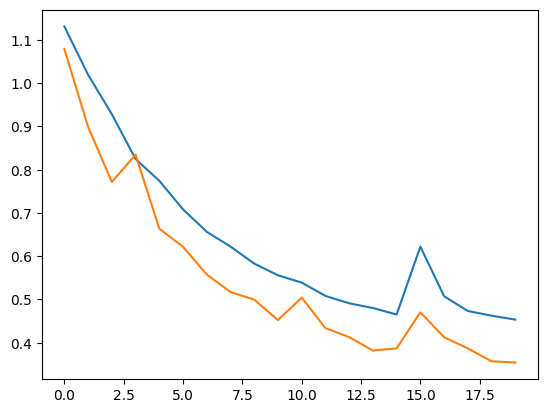

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
# Get the predictions and ground truth labels for train and test data
train_predictions = np.argmax(model1.predict(train_datagen), axis=-1)
train_labels = train_datagen.classes

test_predictions = np.argmax(model1.predict(test_datagen), axis=-1)
test_labels = test_datagen.classes

# Calculate the confusion matrix for train and test data
train_cm = confusion_matrix(train_labels, train_predictions)
test_cm = confusion_matrix(test_labels, test_predictions)

# Calculate precision, recall, and F1 score for train data
train_precision = precision_score(train_labels, train_predictions, average='weighted')
train_recall = recall_score(train_labels, train_predictions, average='weighted')
train_f1 = f1_score(train_labels, train_predictions, average='weighted')

# Calculate precision, recall, and F1 score for test data
test_precision = precision_score(test_labels, test_predictions, average='weighted')
test_recall = recall_score(test_labels, test_predictions, average='weighted')
test_f1 = f1_score(test_labels, test_predictions, average='weighted')

# Print the results for train data
print("Train Confusion Matrix:")
print(train_cm)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Train F1 Score:", train_f1)

# Print the results for test data
print("Test Confusion Matrix:")
print(test_cm)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1)

7/7 [==============================] - 2s 252ms/step
Train Confusion Matrix:
[[431 298   0 303]
 [468 371   0 337]
 [217 147   0 153]
 [421 300   0 325]]
Train Precision: 0.26104633366089175
Train Recall: 0.2988597189074516
Train F1 Score: 0.2761005317757715
Test Confusion Matrix:
[[50 33  0 31]
 [50 47  0 33]
 [21 17  0 19]
 [44 34  0 38]]
Test Precision: 0.28205378413816795
Test Recall: 0.3237410071942446
Test F1 Score: 0.29946870662277664


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model1 = Sequential()
model1.add(Reshape((224, 224*3), input_shape=(224, 224, 3)))  # Reshape the input to (timesteps, features)
model1.add(Bidirectional(LSTM(64)))
model1.add(Dense(4,activation='softmax'))

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 224, 672)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              377344    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 377,860
Trainable params: 377,860
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.losses import CategoricalCrossentropy
model1.compile(
  optimizer='adam',
  loss=CategoricalCrossentropy(),
  metrics=['accuracy'])

In [ ]:
history = model1.fit(
  train_datagen,
  validation_data=test_datagen,
  epochs=20)

Epoch 1/20
59/59 [==============================] - 710s 12s/step - loss: 0.8054 - accuracy: 0.6924 - val_loss: 0.5306 - val_accuracy: 0.8153
Epoch 2/20
59/59 [==============================] - 60s 1s/step - loss: 0.6320 - accuracy: 0.7733 - val_loss: 0.5745 - val_accuracy: 0.7866
Epoch 3/20
59/59 [==============================] - 59s 999ms/step - loss: 0.5747 - accuracy: 0.7820 - val_loss: 0.5052 - val_accuracy: 0.7866
Epoch 4/20
59/59 [==============================] - 61s 1s/step - loss: 0.5452 - accuracy: 0.7839 - val_loss: 0.4155 - val_accuracy: 0.8225
Epoch 5/20
59/59 [==============================] - 60s 1s/step - loss: 0.4840 - accuracy: 0.8035 - val_loss: 0.4237 - val_accuracy: 0.8201
Epoch 6/20
59/59 [==============================] - 60s 1s/step - loss: 0.4869 - accuracy: 0.8001 - val_loss: 0.3991 - val_accuracy: 0.8369
Epoch 7/20
59/59 [==============================] - 61s 1s/step - loss: 0.4628 - accuracy: 0.8096 - val_loss: 0.3748 - val_accuracy: 0.8369
Epoch 8/20
59/5

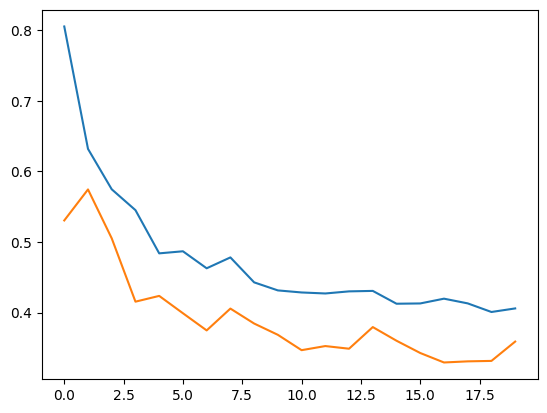

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
# Get the predictions and ground truth labels for train and test data
train_predictions = np.argmax(model1.predict(train_datagen), axis=-1)
train_labels = train_datagen.classes

test_predictions = np.argmax(model1.predict(test_datagen), axis=-1)
test_labels = test_datagen.classes

# Calculate the confusion matrix for train and test data
train_cm = confusion_matrix(train_labels, train_predictions)
test_cm = confusion_matrix(test_labels, test_predictions)

# Calculate precision, recall, and F1 score for train data
train_precision = precision_score(train_labels, train_predictions, average='weighted')
train_recall = recall_score(train_labels, train_predictions, average='weighted')
train_f1 = f1_score(train_labels, train_predictions, average='weighted')

# Calculate precision, recall, and F1 score for test data
test_precision = precision_score(test_labels, test_predictions, average='weighted')
test_recall = recall_score(test_labels, test_predictions, average='weighted')
test_f1 = f1_score(test_labels, test_predictions, average='weighted')

# Print the results for train data
print("Train Confusion Matrix:")
print(train_cm)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Train F1 Score:", train_f1)

# Print the results for test data
print("Test Confusion Matrix:")
print(test_cm)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1)

7/7 [==============================] - 2s 339ms/step
Train Confusion Matrix:
[[426 295   8 303]
 [451 363   7 355]
 [215 149   3 150]
 [407 342   6 291]]
Train Precision: 0.2668801064672288
Train Recall: 0.2871917263325378
Train F1 Score: 0.2662840007383701
Test Confusion Matrix:
[[41 36  1 36]
 [52 40  2 36]
 [15 25  0 17]
 [46 36  2 32]]
Test Precision: 0.23737299683603022
Test Recall: 0.2709832134292566
Test F1 Score: 0.2521745860698238
